In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv("D:/UWaterloo/Data Knowledge and Modelling/Assignment 1/abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

In [138]:
df

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


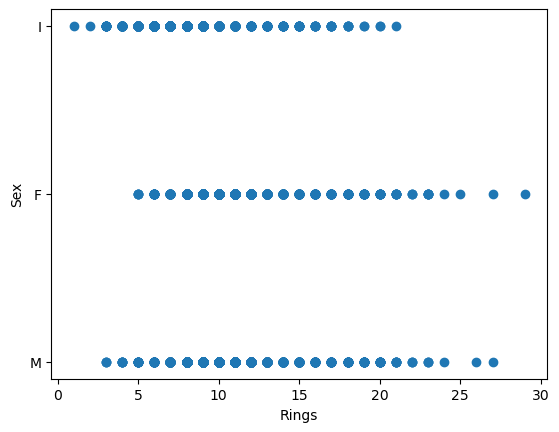

In [122]:
# Check any relationship between Sex and Rings
plt.scatter(y=df['Sex'], x=df['Rings'])
plt.xlabel('Rings')
plt.ylabel('Sex')
plt.show()

# This feature is not a very helpful tool to predict the Rings and hence we can drop it. 

In [177]:
X = df.iloc[:, 1:8]  # Removing sex feature  
y = df.iloc[:, 8]
list_scores = []

# Split the dataset into 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_initial_score = knn.score(X_test, y_test)
knn_initial_score

0.20933014354066987

In [226]:
# Balance the training dataset
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=1)
X_train_sampled, y_train_sampled = os.fit_resample(X_train, y_train)

In [227]:
# Apply Z-score 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sampled.iloc[:, 1:] = sc.fit_transform(X_train_sampled.iloc[:, 1:])

In [253]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

def model_training(K):
    model_score = []
    accuracy_list = []
    # Split the 80% training dataset using KFold
    kf = StratifiedKFold(n_splits=5)

    for train_index, test_index in kf.split(X_train_sampled, y_train_sampled):
        X_train, X_test = X_train_sampled.iloc[train_index,:], X_train_sampled.iloc[test_index,:] 
        y_train, y_test = y_train_sampled[train_index] , y_train_sampled[test_index]

        # create model for every fold
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)
        model_score.append(knn.score(X_test, y_test))
        pred_values = knn.predict(X_test)

        acc = accuracy_score(pred_values , y_test)
        accuracy_list.append(acc)

    avg_accuracy = sum(accuracy_list)/K
    return avg_accuracy

5 0.7574429864321597
6 0.621519800160922
7 0.5226530054148931
8 0.4489571512703297
9 0.3929638585694588
10 0.34770193494068774
11 0.311094407393828
12 0.2816684996493737
13 0.2555727187905966
14 0.23472389443496144


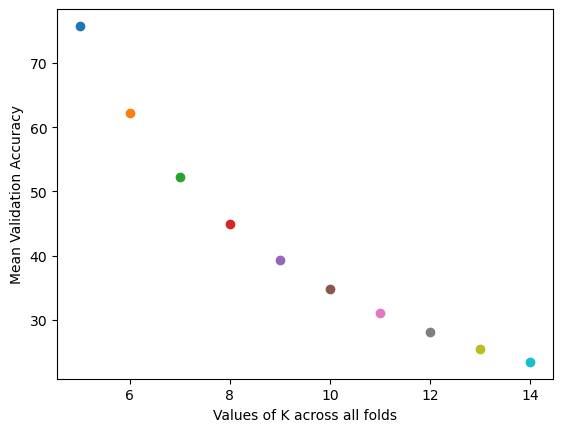

In [265]:
for i in range(5, 15):
    avg_acc = model_training(i)
    print(i, avg_acc)
    plt.scatter(x=i, y=avg_acc*100)
    plt.xlabel("Values of K across all folds")
    plt.ylabel("Mean Validation Accuracy")

As per the graph and on the basis of the type of dataset, we consider K = 10 to be the best choice.

In [266]:
# Running KNN using K=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_initial_score = knn.score(X_test, y_test)
knn_initial_score

0.22607655502392343